# 6.2 ESA Task 6.2 Exploring relationships - Switzerland

## Table of Contents

### 01. Import libraries and datasets

### 02. Verify dataset import results

### 03. Combine dataframe subsets for EDA

### 04. EDA (Exploratory Data Analysis)

>#### 04.01 Correlation matrix heatmaps

>>##### Switzerland

>#### 04.02 Scatterplots

>>##### Switzerland

>#### 04.03 Pair Plots

>>##### Switzerland

>#### 04.04 Categorical Plots

>>##### Switzerland

>>>##### Scatterplots & stacked bar histograms with categorical exogenous shock variable overlay

### 01. Import libraries and datasets

In [3]:
import pandas as pd
import numpy as np
import os

# Import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

In [394]:
# Create string path to main project folder, to use with a Python shortcut for importing files

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

# Import first dataset

fx_vix_comm = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'fx_vix_comm_pre_stat.pkl'))

# Import seven (7) country-level subset datasets

ctry_us = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'us_pre_stat.pkl'))
ctry_germany = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'germany_pre_stat.pkl'))
ctry_japan = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'japan_pre_stat.pkl'))
ctry_south_korea = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'south_korea_pre_stat.pkl'))
ctry_australia = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'australia_pre_stat.pkl'))
ctry_norway = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'norway_pre_stat.pkl'))
ctry_switzerland = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'switzerland_pre_stat.pkl'))

### 02. Verify dataset import results

In [14]:
# Check the dimensions
fx_vix_comm.shape

(243, 74)

In [16]:
# Check the last 3 rows
fx_vix_comm.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [50]:
ctry_switzerland.shape

(243, 29)

In [52]:
ctry_switzerland.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg
4857,Switzerland,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,8967407.0,0.056512,-0.0122,-0.0128,-0.0045,0.061440,0.004024,0.003562,0.00896,0.005091
4858,Switzerland,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,8967407.0,0.022473,-0.0130,-0.0133,-0.0043,0.110014,0.003256,0.003562,0.00896,0.005091
4859,Switzerland,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,8967407.0,-0.011300,-0.0119,-0.0119,-0.0013,0.093164,0.003441,0.003562,0.00896,0.005091


### 03. Combine dataframe subsets for EDA

#### Switzerland

In [355]:
# Check for candidate target columns from ctry_switzerland
ctry_switzerland.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'population_pct_chg'],
      dtype='object')

In [359]:
# Select specific columns from each dataframe, to form 2 subset dataframes which will be combined (merged, in this case)
# Select the first-step transformed variables rather than original variables for more meaningful EDA
df1 = ctry_switzerland[['country', 'timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
               'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
               'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'population_pct_chg']]
df2 = fx_vix_comm[['timestamp', 'vix_avg_logret12', 'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12', 'eur_chf_logret12',\
                   'usd_chf_logret12', 'gold_oz_usd_logret12']]

In [361]:
df1.shape

(243, 15)

In [363]:
df2.shape

(243, 8)

In [365]:
# Merge df1 and df2 subset dataframes using a left join, which ensures that all rows from df1 are retained
# Note: from prior work creating the parent dataframes, we know that the 'timestamp' values should match precisely, in chronological order
ctry_switzerland_merge = pd.merge(df1, df2, on='timestamp', how='left')

In [367]:
ctry_switzerland_merge.shape

(243, 22)

In [369]:
ctry_switzerland_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12
240,Switzerland,2025-01-01,False,False,False,True,True,-0.0122,-0.0128,-0.0045,...,0.003562,0.00896,0.005091,0.224487,0.011364,0.012739,0.010516,0.000000,0.056512,0.286810
241,Switzerland,2025-02-01,False,False,False,True,True,-0.0130,-0.0133,-0.0043,...,0.003562,0.00896,0.005091,0.193819,0.005698,0.025642,-0.015594,-0.010582,0.022473,0.358192
242,Switzerland,2025-03-01,False,False,False,True,True,-0.0119,-0.0119,-0.0013,...,0.003562,0.00896,0.005091,0.459799,0.045462,0.069870,0.000415,-0.010363,-0.011300,0.323844


In [371]:
ctry_switzerland_merge.head(15)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12
0,Switzerland,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Switzerland,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Switzerland,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Switzerland,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Switzerland,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Switzerland,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Switzerland,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Switzerland,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Switzerland,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Switzerland,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:
# As for the United States (above), delete first 12 rows and overwrite the subset merged dataframe
ctry_switzerland_merge.drop(index=range(12), inplace=True)

In [375]:
ctry_switzerland_merge.shape

(231, 22)

In [377]:
ctry_switzerland_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12
12,Switzerland,2006-01-01,False,False,False,False,False,0.0015,0.0027,-0.0010,...,0.049054,0.041142,0.006295,-0.110001,-0.074108,-0.133531,0.027940,0.000000,0.098440,0.259859
13,Switzerland,2006-02-01,False,False,False,False,False,0.0028,0.0032,-0.0013,...,0.049054,0.041142,0.006295,0.062883,-0.038100,-0.167054,0.026895,0.006431,0.088411,0.270769
14,Switzerland,2006-03-01,False,False,False,False,False,0.0028,0.0044,0.0016,...,0.049054,0.041142,0.006295,-0.116166,-0.028171,-0.155755,0.002453,0.012821,0.113023,0.250028


In [379]:
# As for the United States (above), reset the index (the argument "drop=True" drops the original index)
ctry_switzerland_merge.reset_index(drop=True, inplace=True)

In [381]:
ctry_switzerland_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12
0,Switzerland,2006-01-01,False,False,False,False,False,0.0015,0.0027,-0.0010,...,0.049054,0.041142,0.006295,-0.110001,-0.074108,-0.133531,0.027940,0.000000,0.098440,0.259859
1,Switzerland,2006-02-01,False,False,False,False,False,0.0028,0.0032,-0.0013,...,0.049054,0.041142,0.006295,0.062883,-0.038100,-0.167054,0.026895,0.006431,0.088411,0.270769
2,Switzerland,2006-03-01,False,False,False,False,False,0.0028,0.0044,0.0016,...,0.049054,0.041142,0.006295,-0.116166,-0.028171,-0.155755,0.002453,0.012821,0.113023,0.250028


In [383]:
ctry_switzerland_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12
228,Switzerland,2025-01-01,False,False,False,True,True,-0.0122,-0.0128,-0.0045,...,0.003562,0.00896,0.005091,0.224487,0.011364,0.012739,0.010516,0.000000,0.056512,0.286810
229,Switzerland,2025-02-01,False,False,False,True,True,-0.0130,-0.0133,-0.0043,...,0.003562,0.00896,0.005091,0.193819,0.005698,0.025642,-0.015594,-0.010582,0.022473,0.358192
230,Switzerland,2025-03-01,False,False,False,True,True,-0.0119,-0.0119,-0.0013,...,0.003562,0.00896,0.005091,0.459799,0.045462,0.069870,0.000415,-0.010363,-0.011300,0.323844


In [385]:
# Export the country = Switzerland subset merged dataframe as backup, before conducting EDA
ctry_switzerland_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ctry_switzerland_merge.pkl'))

#### FX, VIX, commodity indices, commodities

In [388]:
fx_vix_comm.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

In [412]:
# No merging needed for this dataframe, instead a subset dataframe is created for EDA
# As for the oecd_ctry subset merged dataframes created above, the first-step transformed variables are selected
fx_vix_comm_sub = fx_vix_comm[['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
                              'aud_cad_logret12', 'aud_jpy_logret12', 'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',\
                              'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12', 'eur_gbp_logret12', 'eur_jpy_logret12',\
                              'eur_usd_logret12', 'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12','gbp_usd_logret12',\
                              'usd_aud_logret12', 'usd_cad_logret12', 'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12',\
                              'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12', 'wti_avg_logret12', 'brent_avg_logret12',\
                              'nat_gas_eu_avg_logret12', 'lng_asia_avg_logret12', 'metals_idx_avg_logret12', 'iron_ore_avg_logret12',\
                              'copper_avg_logret12', 'aluminum_avg_logret12', 'gold_oz_usd_logret12', 'food_idx_avg_logret12']]

In [414]:
# Check the dimensions
fx_vix_comm_sub.shape

(243, 38)

In [416]:
# Check the last 3 rows
fx_vix_comm_sub.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [418]:
# Check the middle columns of the last 3 rows
fx_vix_comm_sub.iloc[240:243, 9:29]

,chf_cad_logret12,chf_jpy_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12,eur_usd_logret12,gbp_aud_logret12,gbp_cad_logret12,gbp_jpy_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12,vix_avg_logret12,all_comm_idx_avg_logret12,energy_idx_avg_logret12,wti_avg_logret12
240,0.012739,0.010516,0.012121,0.020340,0.000000,-0.023530,0.017037,-0.046957,0.035994,0.040120,0.040320,-0.032003,0.064125,0.071973,0.056512,0.068870,0.224487,0.081167,0.082635,0.021216
241,0.025642,-0.015594,0.000000,0.020340,-0.010582,-0.023811,-0.021275,-0.037740,0.025447,0.051587,0.006908,-0.007968,0.038466,0.057570,0.022473,0.013870,0.193819,0.080687,0.055248,-0.076930
242,0.069870,0.000415,0.035507,0.052993,-0.010363,-0.023530,-0.010866,-0.009217,0.055152,0.072861,0.010141,0.015625,0.038466,0.064539,-0.011300,-0.004817,0.459799,0.025966,-0.040285,-0.174869


In [420]:
# Check the first 15 rows for expected NaNs due to the first-step transformations to an annual cycle conducted in the prior Task 6.1
fx_vix_comm_sub.head(15)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [422]:
# As for the OECD country EDA-targeted created dataframes (above), delete first 12 rows and overwrite the subset dataframe
# Need to modify a copy of the subset dataframe to avoid the warning message "A value is trying to be set on a copy of a slice from a Dataframe"
fx_vix_comm_sub_copy = fx_vix_comm_sub.copy()
fx_vix_comm_sub_copy.drop(index=range(12), inplace=True)

In [424]:
# Check the dimensions
fx_vix_comm_sub_copy.shape

(231, 38)

In [426]:
# Check the first 3 rows
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
12,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
13,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
14,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [428]:
# As for the OECD countries (above), reset the index (the argument "drop=True" drops the original index)
fx_vix_comm_sub_copy.reset_index(drop=True, inplace=True)

In [430]:
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [432]:
fx_vix_comm_sub_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [434]:
# Export the subset dataframe as backup, before conducting EDA
# Rename the copy for brevity as 'fx_vix_comm_sub' in a pickle format
fx_vix_comm_sub_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'fx_vix_comm_sub.pkl'))

### 04. EDA (Exploratory Data Analysis)

#### 04.01 Correlation matrix heatmaps

#### Switzerland

In [29]:
# Create a subset dataframe first to include only those variables of interest
sub_switzerland = ctry_switzerland_merge[['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
                     'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'population_pct_chg', 'vix_avg_logret12',\
                     'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12', 'eur_chf_logret12', 'usd_chf_logret12', 'gold_oz_usd_logret12']]

In [31]:
sub_switzerland.head(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12
0,0.0015,0.0027,-0.0010,0.295918,0.012753,0.049054,0.041142,0.006295,-0.110001,-0.074108,-0.133531,0.027940,0.000000,0.098440,0.259859
1,0.0028,0.0032,-0.0013,0.291891,0.013745,0.049054,0.041142,0.006295,0.062883,-0.038100,-0.167054,0.026895,0.006431,0.088411,0.270769
2,0.0028,0.0044,0.0016,0.293004,0.010148,0.049054,0.041142,0.006295,-0.116166,-0.028171,-0.155755,0.002453,0.012821,0.113023,0.250028


In [627]:
sub_switzerland.tail(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12
228,-0.0122,-0.0128,-0.0045,0.061440,0.004024,0.003562,0.00896,0.005091,0.224487,0.011364,0.012739,0.010516,0.000000,0.056512,0.286810
229,-0.0130,-0.0133,-0.0043,0.110014,0.003256,0.003562,0.00896,0.005091,0.193819,0.005698,0.025642,-0.015594,-0.010582,0.022473,0.358192
230,-0.0119,-0.0119,-0.0013,0.093164,0.003441,0.003562,0.00896,0.005091,0.459799,0.045462,0.069870,0.000415,-0.010363,-0.011300,0.323844


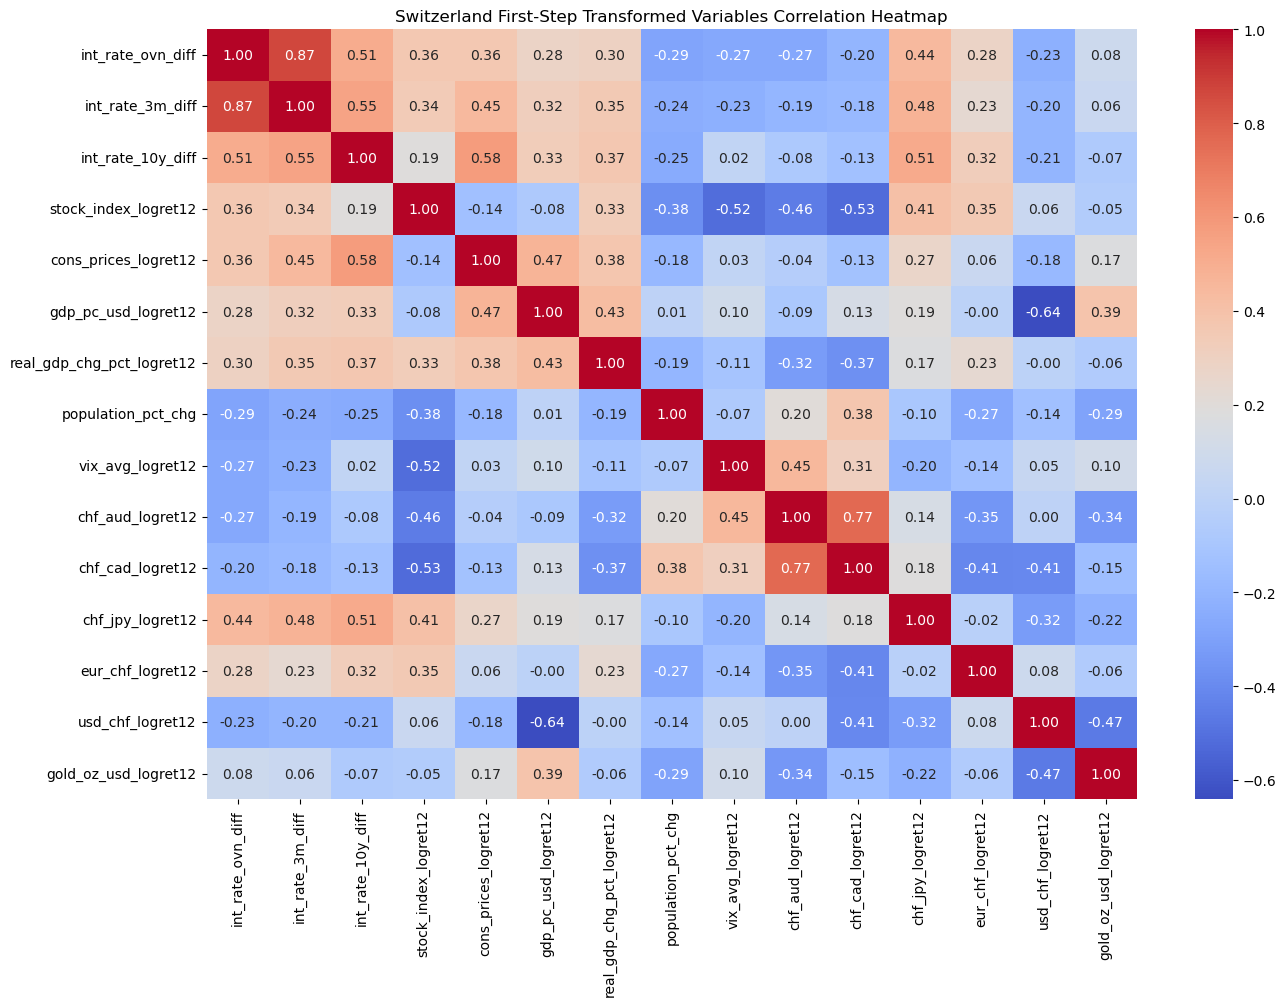

In [629]:
# Generate a correlation matrix heatmap for the first-step transformed variables in the sub_switzerland dataframe

plt.figure(figsize=(15, 10))
sns.heatmap(sub_switzerland.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Switzerland First-Step Transformed Variables Correlation Heatmap")
plt.show()

##### This correlation heatmap examines variables before necessary stationarization and z-score standardization (normalization, rescaling), which will come later.  Accordingly, there will likely be some spurious correlations within the matrix at this EDA stage.  The correlations measured are between mostly log return (12 months) first-step transformed variables, and to a lesser extent with a few first difference of % variables.

#### Preliminary Interpretation

##### This will merely highlight divergences with the US correlation heatmap results or interesting relationships.

##### Interest rate variables had moderate-strong positive correlations with inflation (+0.36-0.58) and separately, with CHFJPY (Japanese Yen amount per 1 Swiss Franc), ranging +0.44-0.51 for the latter.  Not with the other cross-currency pairs containing CHF.  Japanese capital flows appear to seek out higher-yielding, major currencies, although there are many factors impacting cross-currency movements, beyond simple interest rate differentials.

##### The primary stock market index log returns had moderate-strong negative correlation (-0.52) with the VIX, as many other stock index returns of other countries sampled here have shown.  Meanwhile, the stock market had moderate-strong negative correlations (-0.46-0.53) with the currencies of two resource-rich countries, Australia and Canada, in the CHFAUD and CHFCAD cross-rates.  Relative to CHFJPY, the Swiss stock market relationship or dynamic was the opposite, revealing a moderate positive correlation (+0.41).  Swiss exports comprised a very high 75% of GDP in 2023, while imports at ~ 63% comprised a bit less that year.  Australia, Canada and Japan are not among Switzerland's top eight (8) trading partners, thus the latter's varying (and for one pair, opposite) moderate-strong correlations for its cross-currency pairs with these countries may be difficult to explain.

##### Inflation rate had moderate positive correlations (+0.38-0.47) with both GDP measures.

##### GDP per capita in USD had a strong negative correlation (-0.64) with USDCHF (Swiss Franc amount per 1 USD), and a moderate positive correlation (+0.39) with gold price (in USD) log returns (annual).  Switzerland is a global trader, refiner, importer and exporter of gold, and holds large gold reserves, thus a not-small degree of positive correlation with gold prices is a reasonable expectation.

##### VIX, as noted in the earlier Australia country "Preliminary Interpretation" section, showed a moderate positive correlation (+0.45) with CHFAUD (Australian Dollar amount per 1 Swiss Franc).  This dynamic makes sense as CHFAUD is a different version "risk on/risk off" barometer but not as "famous" or widely-quoted as the AUDJPY barometer, which steals the spotlight as a global binary risk sentiment gauge.

##### Gold price log returns (annual) showed moderate negative correlations (-0.34-0.47) with CHFAUD and USDCHF (Swiss Franc amount per 1 USD).  Thus CHF loses ground to some degree against AUD but gains on USD in a rising gold price environment. Australia as mentioned previously is a major gold producer.

### 04.02 Scatterplots

### Comment: All scatterplots here are of first-step transformed variables as log returns (annual) or first difference %'s. For brevity the short form of the variable name is used in plot labels and descriptive commentary.

### Note: Both versions of the GDP measure change data values annually rather than monthly, while all other variables (except population) change data values monthly, thus the scatterplots that include either GDP measure will have straight lines of dots representing this difference in measurement periodicity.

#### Switzerland

In [812]:
# Check variables for candidate scatterplots based on the prior correlation heatmap results
sub_switzerland.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'population_pct_chg', 'vix_avg_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_chf_logret12', 'usd_chf_logret12', 'gold_oz_usd_logret12'],
      dtype='object')

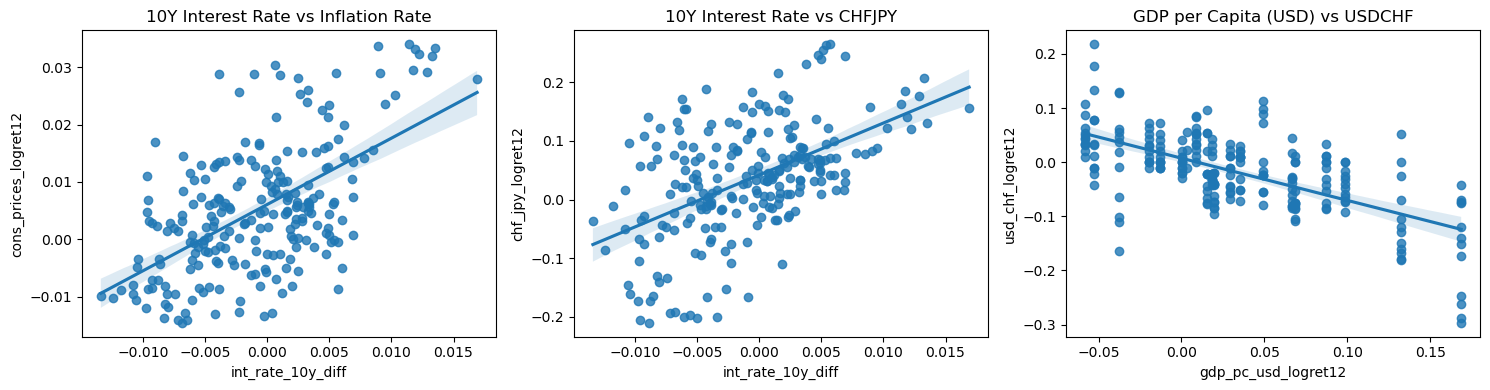

In [814]:
# Three scatterplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='int_rate_10y_diff', y='cons_prices_logret12', data=sub_switzerland, ax=axes[0])
axes[0].set_title('10Y Interest Rate vs Inflation Rate')
sns.regplot(x='int_rate_10y_diff', y='chf_jpy_logret12', data=sub_switzerland, ax=axes[1])
axes[1].set_title('10Y Interest Rate vs CHFJPY')
sns.regplot(x='gdp_pc_usd_logret12', y='usd_chf_logret12', data=sub_switzerland, ax=axes[2])
axes[2].set_title('GDP per Capita (USD) vs USDCHF')
plt.tight_layout()
plt.show()

### The Swiss National Bank, Switzerland's central bank, is arguably the world's best manager of local inflation.  This is evident in the relatively tight range of x,y data pairs in the left-hand plot.  Similar to other central banks, it adjusts interest rates (higher) to moderate (dampen) the inflation rate, ameliorating the cost of living.  The middle plot underscores that FX capital flows from JPY to the CHF (Swiss Franc) when the Swiss 10-year interest rate climbs.  In the right-hand plot, population-normalized GDP (expressed in USD) positive growth is associated with Swiss Franc appreciation against the USD.

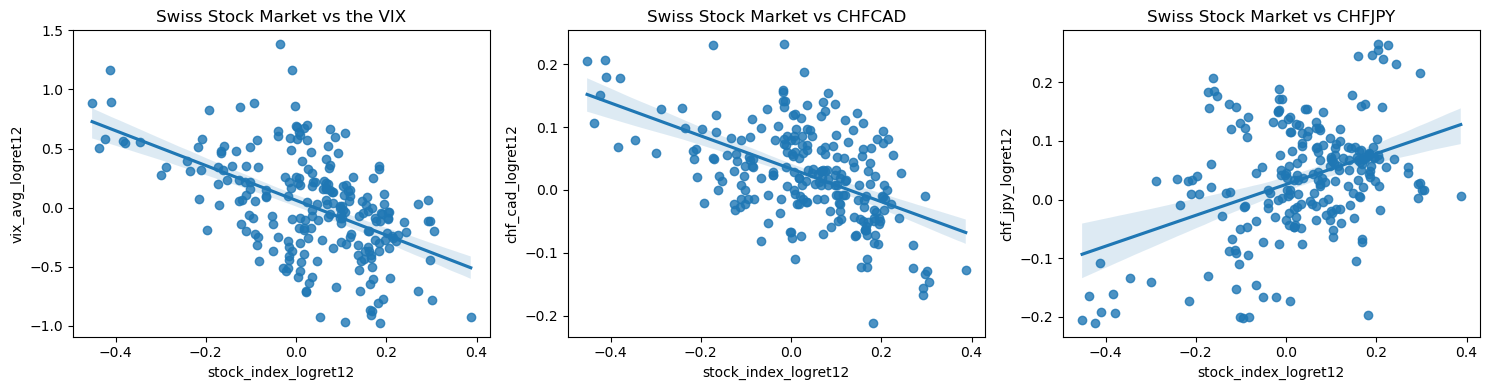

In [817]:
# Three scatterplots to look at stock market return correlation patterns with other variables
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='stock_index_logret12', y='vix_avg_logret12', data=sub_switzerland, ax=axes[0])
axes[0].set_title('Swiss Stock Market vs the VIX')
sns.regplot(x='stock_index_logret12', y='chf_cad_logret12', data=sub_switzerland, ax=axes[1])
axes[1].set_title('Swiss Stock Market vs CHFCAD')
sns.regplot(x='stock_index_logret12', y='chf_jpy_logret12', data=sub_switzerland, ax=axes[2])
axes[2].set_title('Swiss Stock Market vs CHFJPY')
plt.tight_layout()
plt.show()

### Swiss stock market growth is associated with a VIX decline (left-hand plot) and appreciation of the CHF against the CAD (Canadian Dollar) and JPY (middle and right-hand plots, respectively).

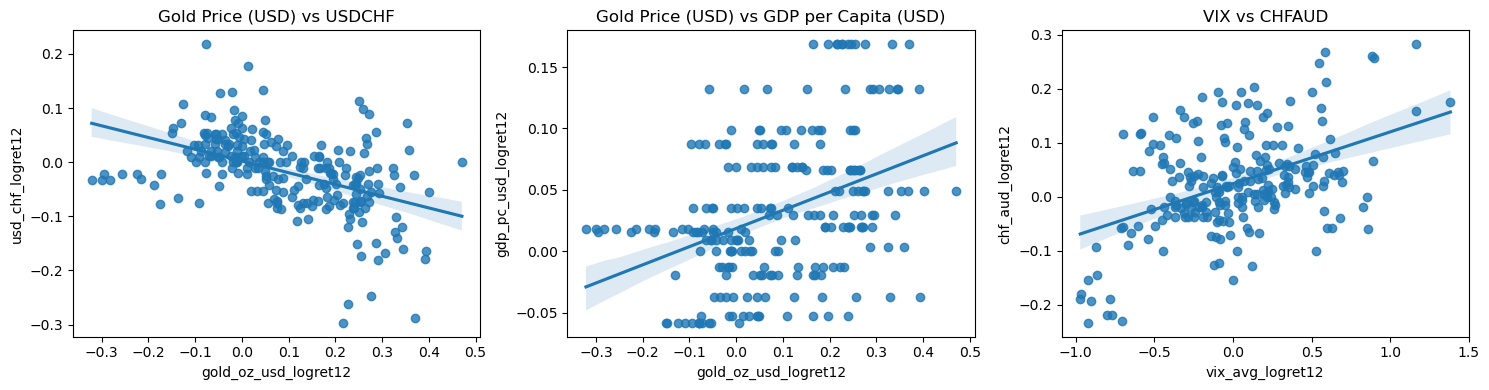

In [820]:
# Three more scatterplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='gold_oz_usd_logret12', y='usd_chf_logret12', data=sub_switzerland, ax=axes[0])
axes[0].set_title('Gold Price (USD) vs USDCHF')
sns.regplot(x='gold_oz_usd_logret12', y='gdp_pc_usd_logret12', data=sub_switzerland, ax=axes[1])
axes[1].set_title('Gold Price (USD) vs GDP per Capita (USD)')
sns.regplot(x='vix_avg_logret12', y='chf_aud_logret12', data=sub_switzerland, ax=axes[2])
axes[2].set_title('VIX vs CHFAUD')
plt.tight_layout()
plt.show()

### Higher gold prices (in USD) help the Swiss Franc appreciate against the USD (left-side plot).  The middle plot is difficult to decipher, but in general, gold price appreciation should contribute to Swiss GDP growth.  The right-hand plot confirms other risk aversion plot results here.  As the VIX, a US equities market fear gauge (that appears to have global reach) climbs, so too the Swiss Franc (a safe haven currency) gains on the Australian Dollar (a "risk on" currency for speculation).

### 04.03 Pair Plots

#### Switzerland

In [45]:
# Check variables for candidate pair plots based on prior scatterplots
sub_switzerland.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'population_pct_chg', 'vix_avg_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_chf_logret12', 'usd_chf_logret12', 'gold_oz_usd_logret12'],
      dtype='object')

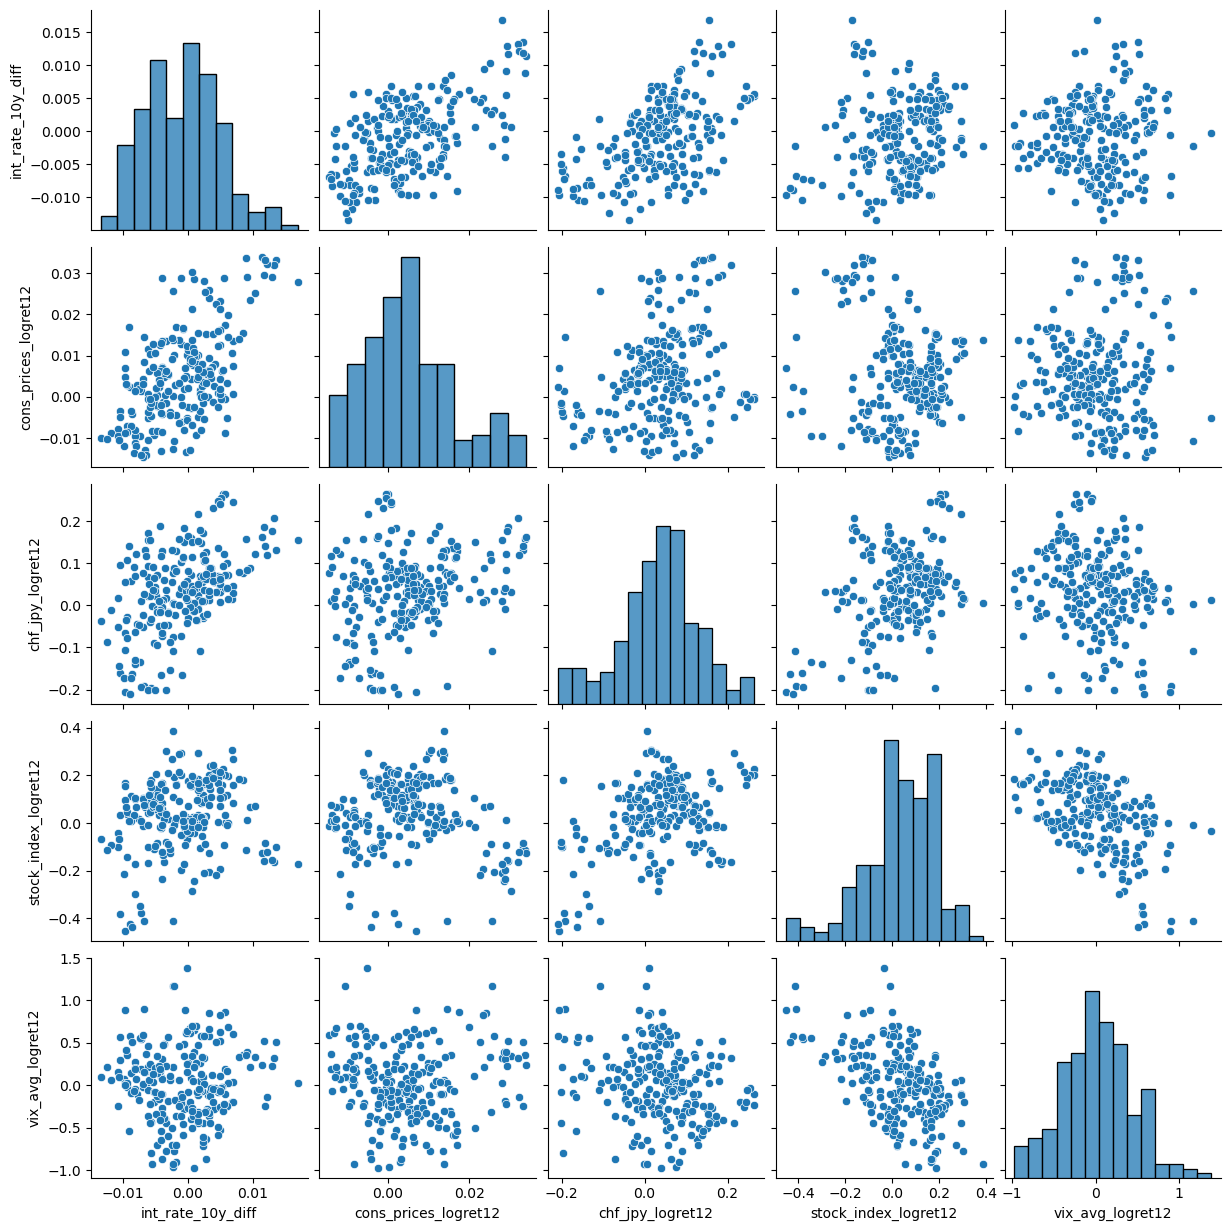

In [47]:
# Create a pair plot matrix
sub_switzerland_1 = sub_switzerland[['int_rate_10y_diff', 'cons_prices_logret12', 'chf_jpy_logret12', 'stock_index_logret12', 'vix_avg_logret12']]
p_switzerland_1 = sns.pairplot(sub_switzerland_1)

#### The variables have approximate Normal frequency distributions, with minor skew. Further exploration: (1) 10-year interest rate vs inflation rate, to assess the Swiss National Bank's effective use of interest rate tools to control inflation (Switzerland is well known for its stable monetary policy and keeping inflation low), with the scatterplot confirming a positive correlation between the variables; (2) 10-year interest rate vs CHFJPY (Japanese Yen amount per 1 Swiss Franc) to examine Swiss interest rate impact on the FX cross-rate between the world's top two safe haven currencies, which confirms an expected positive correlation; (3) stock market vs CHFJPY, because Switzerland competes with Japan in many high end product markets and external trade comprises a far higher % of Swiss GDP as compared with Japan, where the scatterplot reveals a positive correlation between the two variables; and (4) stock market vs the VIX, to see how a US equities market fear gauge (the VIX) impacts a non-US stock market (Switzerland, in this case), and because the scatterplot suggests an inverse (negative) correlation as per the US experience.

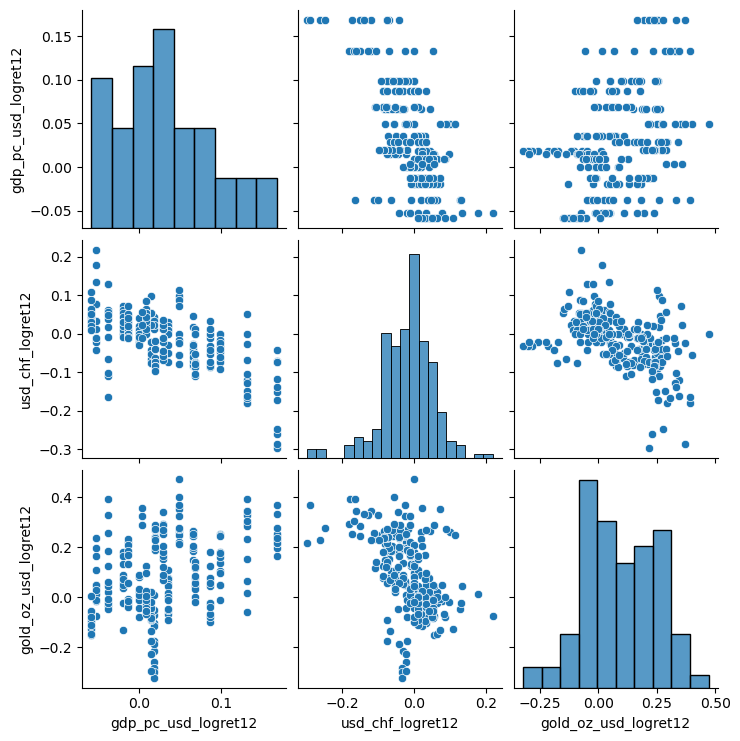

In [49]:
# Create another pair plot matrix
sub_switzerland_2 = sub_switzerland[['gdp_pc_usd_logret12', 'usd_chf_logret12', 'gold_oz_usd_logret12']]
p_switzerland_2 = sns.pairplot(sub_switzerland_2)

#### The 'usd_chf' variable has an approximate Normal frequency distribution, 'gold_oz_usd' has an asymmetrical shape and 'gdp_pc_usd' is right-skewed. Further exploration: (1) GDP per Capita vs USDCHF (Swiss Franc amount per 1 USD), because Switzerland and the US are major trading partners, and as expected the scatterplot shows an unambiguous inverse (negative) correlation between the two variables; (2) GDP per Capita vs Gold price, to see if a correlation exists with that commodity (Switzerland is a major gold trader and refiner, but does not mine the precious metal as Australia does), where the scatterplot points to a positive correlation despite some outliers; and (3) Gold price vs USDCHF, to see how a world "safe haven" (gold) commodity's price impacts the FX cross-rate between the world's #3 (USD) and #1 (CHF) "safe haven" currencies, where the scatterplot reveals a negative correlation.

### 04.04 Categorical Plots

#### Disclosure: I engaged ChatGPT to create and name two custom-defined functions below -- namely, shockstack_grid and shockstack_kdegrid_v2 -- for some of the plot matrices in this section. This helped expedite further visualization of dozens of variables, conserve space and time, optimize formatting and legends and right-size grids with varying quantities of sub-plots.

#### The subset dataframes created for EDA correlation heatmaps and pair plots omitted the time variable but were all organized exactly the same way chronologically (and the year 2005 row data was omitted as all the first-step transformed variables as annual log returns, etc. had NaN values that year because monthly data began with Jan 2005), and consisted entirely of numerical variables (no categorical variables). Since these next visualizations target the addition of a categorical dimension, it makes sense now to add a column to the subset dataframes of interest that specifies which -- if any -- exogenous economic shock or shocks existed for the data values in each row (where each row corresponds to a month/year point in time). During normal times, when there were no shock(s) occurring, the categorical data value "No Shock" will be applied.  The goal of the categorical plots is to visually zero in on outlier x,y data points in the scatterplots to see which shock(s), if any, caused some or most of the extreme fluctuations.

#### First it's helpful to create an exogenous economic shock-specific subset dataframe, with a derived column 'shock_name' to name the shock(s) if any that existed at each point in time.

#### Begin by examining the fx_vix_comm_sub_copy subset dataframe on dimensions, content and column names, from which we will extract the shock-related columns to create another subset dataframe.

In [987]:
fx_vix_comm_sub_copy.shape

(231, 38)

In [991]:
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [993]:
fx_vix_comm_sub_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [995]:
fx_vix_comm_sub_copy.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12',
       'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12',
       'wti_avg_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12',
       'lng_asia_avg_logret12', 'metals_idx_avg_logret12',
       'iron_ore_avg_logret12', 'copper_avg_logret12', 'aluminum_avg_logret12',
       'gold_oz_usd_logret12', 'food_idx_avg_logret12'],
      dtype='object')

#### Create an exogenous economic shocks-specific subset dataframe, and then verify dimensions and content

In [1013]:
exo_shk_flags = fx_vix_comm_sub_copy[['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag']]

In [1015]:
exo_shk_flags.shape

(231, 6)

In [1017]:
exo_shk_flags.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag
0,2006-01-01,False,False,False,False,False
1,2006-02-01,False,False,False,False,False
2,2006-03-01,False,False,False,False,False


In [1019]:
exo_shk_flags.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag
228,2025-01-01,False,False,False,True,True
229,2025-02-01,False,False,False,True,True
230,2025-03-01,False,False,False,True,True


#### Create and add a derived column 'shock_name' and applicable shock name categorical data values to the subset dataframe

In [1021]:
exo_shk_flags_copy = exo_shk_flags.copy()

In [1025]:
exo_shk_flags_copy.loc[exo_shk_flags_copy['gfc_flag'] == True, 'shock_name'] = 'GFC'

In [1031]:
exo_shk_flags_copy.loc[exo_shk_flags_copy['cpc_flag'] == True, 'shock_name'] = 'CPC'

In [1033]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == True) & (exo_shk_flags_copy['rus_ukr_war_flag'] == False), 'shock_name'] = 'Cov-19'

In [1035]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == True) & \
                       (exo_shk_flags_copy['rus_ukr_war_flag'] == True), 'shock_name'] = 'Cov-19 & Rus_Ukr_War'

In [1037]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == True) & \
                  (exo_shk_flags_copy['boj_int_rate_flag'] == False), 'shock_name'] = 'Rus_Ukr_War'

In [1039]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == True) & \
                  (exo_shk_flags_copy['boj_int_rate_flag'] == True), 'shock_name'] = 'Rus_Ukr_War & BOJ Pivot'

In [1045]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['gfc_flag'] == False) & (exo_shk_flags_copy['cpc_flag'] == False) & \
                       (exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == False) & \
                       (exo_shk_flags_copy['boj_int_rate_flag'] == False), 'shock_name'] = 'No Shock'

#### Check the modified dataframe dimensions and content to verify that the 'shock_name' column derivation took place as intended

In [1047]:
exo_shk_flags_copy.shape

(231, 7)

In [1049]:
exo_shk_flags_copy['shock_name'].value_counts(dropna = False)

shock_name
No Shock                   132
GFC                         29
Cov-19                      23
Cov-19 & Rus_Ukr_War        16
Rus_Ukr_War & BOJ Pivot     13
CPC                          9
Rus_Ukr_War                  9
Name: count, dtype: int64

### Interesting result. The counts above (which count the number of months, since the data are monthly) tell us: normal economic conditions ("No Shock" periods) comprised only 57% (132/231) of the 19-year plus 3-month temporal range.  Conversely, shocks big (Great Financial Crisis, Covid-19) and small (2014 Commodity Price Collapse, still-ongoing Russia-Ukraine War and the still-ongoing 2024 Bank of Japan Interest Rate Pivot) in total comprised 43% of that temporal range.  We lurch from crisis to crisis, shock to shock.  Hence, this independent study project has the goal of understanding different types of past or current exogenous economic shocks' impact on some countries and asset classes, to help model potential outcomes for these variables based on the new shock that rolled out in April 2025, e.g. US tariff policy changes.

In [1051]:
exo_shk_flags_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
0,2006-01-01,False,False,False,False,False,No Shock
1,2006-02-01,False,False,False,False,False,No Shock
2,2006-03-01,False,False,False,False,False,No Shock


In [1053]:
exo_shk_flags_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
228,2025-01-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot


In [1055]:
# Export the exogenous shock-specific subset dataframe as backup, as it may prove useful later
exo_shk_flags_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'exo_shk_flags_copy.pkl'))

#### Define a custom function to create a grid of histograms for selected variables, with a categorical variable overlay.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

def shockstack_grid(df, vars_to_plot, hue='shock_name', bins=20, cols=3, figsize_per_plot=(6, 5),
                     save=False, filename=None, filetype='png', output_dir='.'):
    """
    Plots a grid of color-stacked histograms for selected variables using the 'hue' column (default: 'shock_name').

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        vars_to_plot (list of str): List of up to 9 numeric variable names to include.
        hue (str): Column name to use for stacked colors (e.g., 'shock_name').
        bins (int): Number of bins for histogram.
        cols (int): Number of columns in the subplot grid (2 or 3 recommended).
        figsize_per_plot (tuple): Size per subplot (width, height).
        save (bool): If True, saves to disk.
        filename (str): If "save" chosen, specify the filename for the output.
        filetype (str) : If "save" chosen, optional other formats include 'pdf', otherwise defaults to 'png'.
        output_dir (str): Path where figures are saved.
    """
    num_vars = len(vars_to_plot)
    rows = math.ceil(num_vars / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(figsize_per_plot[0] * cols, figsize_per_plot[1] * rows), constrained_layout=True)
    axes = axes.flatten() if num_vars > 1 else [axes]
    
    # Define color palette
    categories = df[hue].dropna().unique()
    palette = sns.color_palette("tab10", len(categories))
    color_dict = dict(zip(categories, palette))
    
    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        # Drop NA rows for variable and hue
        sub_df = df[[var, hue]].dropna()

        # Create binned intervals
        bin_counts = pd.cut(sub_df[var], bins=bins)
        
        # Cross-tabulate
        ctab = pd.crosstab(bin_counts, sub_df[hue])

        # Ensure consistent order
        ctab = ctab[categories]  # match hue order to color_dict

        # Plot stacked bar
        ctab.plot(kind='bar', stacked=True, ax=ax, color=[color_dict[c] for c in categories], edgecolor='black', linewidth=0.3, legend=False)

        ax.set_title(var, fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', labelrotation=45)

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Central legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[c]) for c in categories]
    fig.legend(handles, categories, title=hue, loc='upper right', bbox_to_anchor=(0.97, 1.05), fontsize=8)
    
    plt.suptitle("Stacked Histograms by Shock Event", fontsize=14)

    if save:
        if filename is None:
            timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
            filename = f"shockstack_grid_{timestamp}.{filetype}"
        else:
            filename = f"{filename}.{filetype}" if not filename.endswith(f".{filetype}") else filename

        full_path = os.path.join(output_dir, filename)
        plt.savefig(full_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved to: {full_path}")
    
    plt.show()


#### Switzerland

#### Add the 'shock_name' categorical variable from the 'exo_shk_flags_copy' dataframe to the earlier-created 'sub_switzerland' subset dataframe filtered for Switzerland, in order to overlay this categorical variable on scatterplots and histograms.

In [92]:
sub_switzerland_1_copy = sub_switzerland.copy()

In [94]:
sub_switzerland_1_copy['shock_name'] = exo_shk_flags_copy['shock_name']

In [96]:
sub_switzerland_1_copy.shape

(231, 16)

In [98]:
sub_switzerland_1_copy.head(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12,shock_name
0,0.0015,0.0027,-0.0010,0.295918,0.012753,0.049054,0.041142,0.006295,-0.110001,-0.074108,-0.133531,0.027940,0.000000,0.098440,0.259859,No Shock
1,0.0028,0.0032,-0.0013,0.291891,0.013745,0.049054,0.041142,0.006295,0.062883,-0.038100,-0.167054,0.026895,0.006431,0.088411,0.270769,No Shock
2,0.0028,0.0044,0.0016,0.293004,0.010148,0.049054,0.041142,0.006295,-0.116166,-0.028171,-0.155755,0.002453,0.012821,0.113023,0.250028,No Shock


In [100]:
sub_switzerland_1_copy.tail(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12,shock_name
228,-0.0122,-0.0128,-0.0045,0.061440,0.004024,0.003562,0.00896,0.005091,0.224487,0.011364,0.012739,0.010516,0.000000,0.056512,0.286810,Rus_Ukr_War & BOJ Pivot
229,-0.0130,-0.0133,-0.0043,0.110014,0.003256,0.003562,0.00896,0.005091,0.193819,0.005698,0.025642,-0.015594,-0.010582,0.022473,0.358192,Rus_Ukr_War & BOJ Pivot
230,-0.0119,-0.0119,-0.0013,0.093164,0.003441,0.003562,0.00896,0.005091,0.459799,0.045462,0.069870,0.000415,-0.010363,-0.011300,0.323844,Rus_Ukr_War & BOJ Pivot


In [102]:
sub_switzerland_1_copy.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'population_pct_chg', 'vix_avg_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_chf_logret12', 'usd_chf_logret12', 'gold_oz_usd_logret12',
       'shock_name'],
      dtype='object')

#### Create a Switzerland scatterplots grid for those variable correlations identified in the prior section "04.03 Pair Plots" for further exploration, adding a categorical variable ('shock_name') to reveal any exogenous economic shock-related patterns in the data pairs.  Save and export the grid visualization.

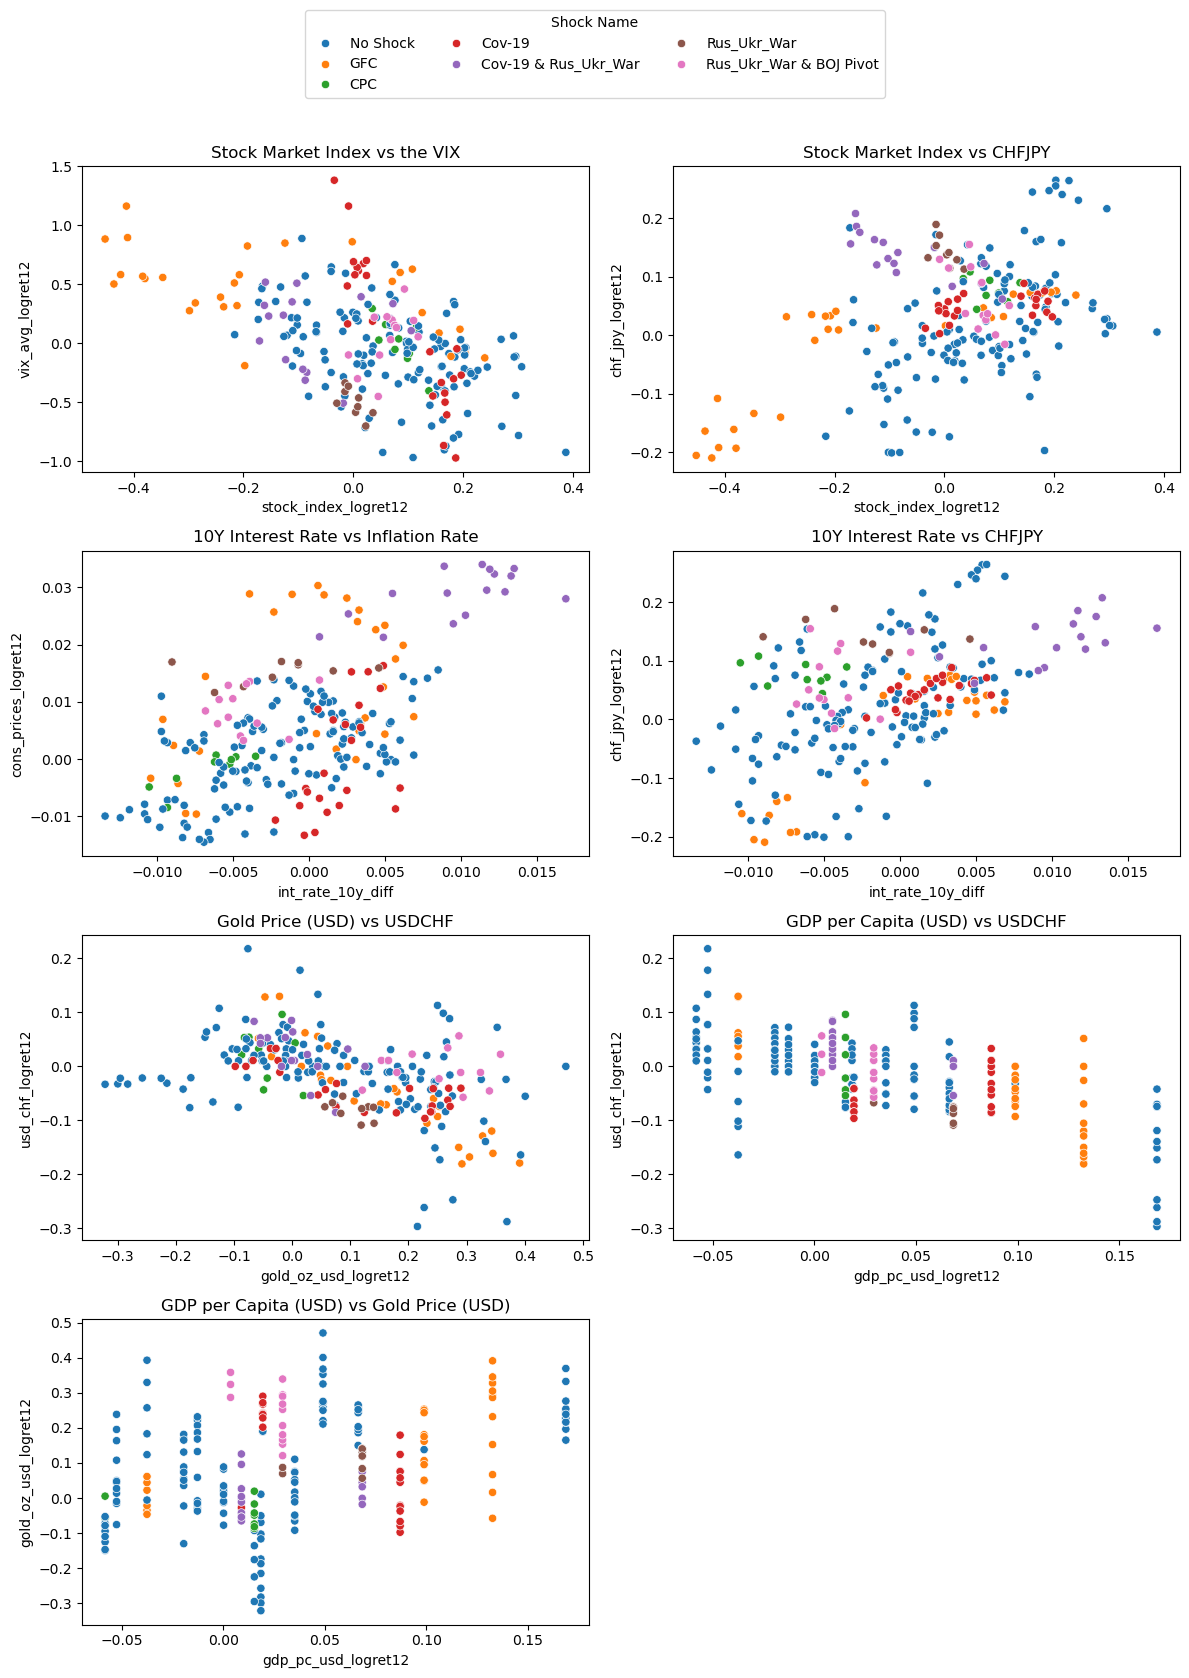

In [106]:
# Create a grid of 7 subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
plot_kwargs = dict(data=sub_switzerland_1_copy, hue='shock_name', legend=False)

# Create scatterplots without individual legends
sns.scatterplot(x='stock_index_logret12', y='vix_avg_logret12', ax=axes[0, 0], **plot_kwargs)
axes[0, 0].set_title('Stock Market Index vs the VIX')

sns.scatterplot(x='stock_index_logret12', y='chf_jpy_logret12', ax=axes[0, 1], **plot_kwargs)
axes[0, 1].set_title('Stock Market Index vs CHFJPY')

sns.scatterplot(x='int_rate_10y_diff', y='cons_prices_logret12', ax=axes[1, 0], **plot_kwargs)
axes[1, 0].set_title('10Y Interest Rate vs Inflation Rate')

sns.scatterplot(x='int_rate_10y_diff', y='chf_jpy_logret12', ax=axes[1, 1], **plot_kwargs)
axes[1, 1].set_title('10Y Interest Rate vs CHFJPY')

sns.scatterplot(x='gold_oz_usd_logret12', y='usd_chf_logret12', ax=axes[2, 0], **plot_kwargs)
axes[2, 0].set_title('Gold Price (USD) vs USDCHF')

sns.scatterplot(x='gdp_pc_usd_logret12', y='usd_chf_logret12', ax=axes[2, 1], **plot_kwargs)
axes[2, 1].set_title('GDP per Capita (USD) vs USDCHF')

sns.scatterplot(x='gdp_pc_usd_logret12', y='gold_oz_usd_logret12', ax=axes[3, 0], **plot_kwargs)
axes[3, 0].set_title('GDP per Capita (USD) vs Gold Price (USD)')

# Turn off empty subplot
axes[3, 1].axis('off')

# Create a dummy plot to extract legend handles and labels
dummy_fig, dummy_ax = plt.subplots()
dummy_plot = sns.scatterplot(x='stock_index_logret12', y='vix_avg_logret12', hue='shock_name', data=sub_switzerland_1_copy, ax=dummy_ax)
handles, labels = dummy_ax.get_legend_handles_labels()
plt.close(dummy_fig)  # Close dummy plot so it doesn't show

# Add single legend to the full grid
fig.legend(handles, labels, title='Shock Name', loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save figure as a high-resolution image
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
fig.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'switzerland_scat_pre_stat.png'), dpi=300, bbox_inches='tight')

plt.show()

#### Switzerland scatterplots show normal period variance sometimes matching or exceeding shock period variance, for several pairs examined here, notably gold price (USD) vs USDCHF (Swiss Franc amount per 1 USD) and a few stock market pairs.  Stationarization will be needed for some variables, such as USDCHF, which has experienced a secular downtrend over the last two decades (in contrast to other major currency pairs, which have fluctuated in mean reversion patterns over that timespan).  Shock periods, generally speaking, have impacted some variables such as the inflation rate for Switzerland less than for other countries.

#### Run the shockstack_grid function on the individual variables used in the scatterplot grid with categorical variable overlay (above), to review the stacked bar histograms grid visualization output, in particular the outlier data values.

✅ Saved to: C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Analysis\Visualizations\switzerland_hist_pre_stat.png


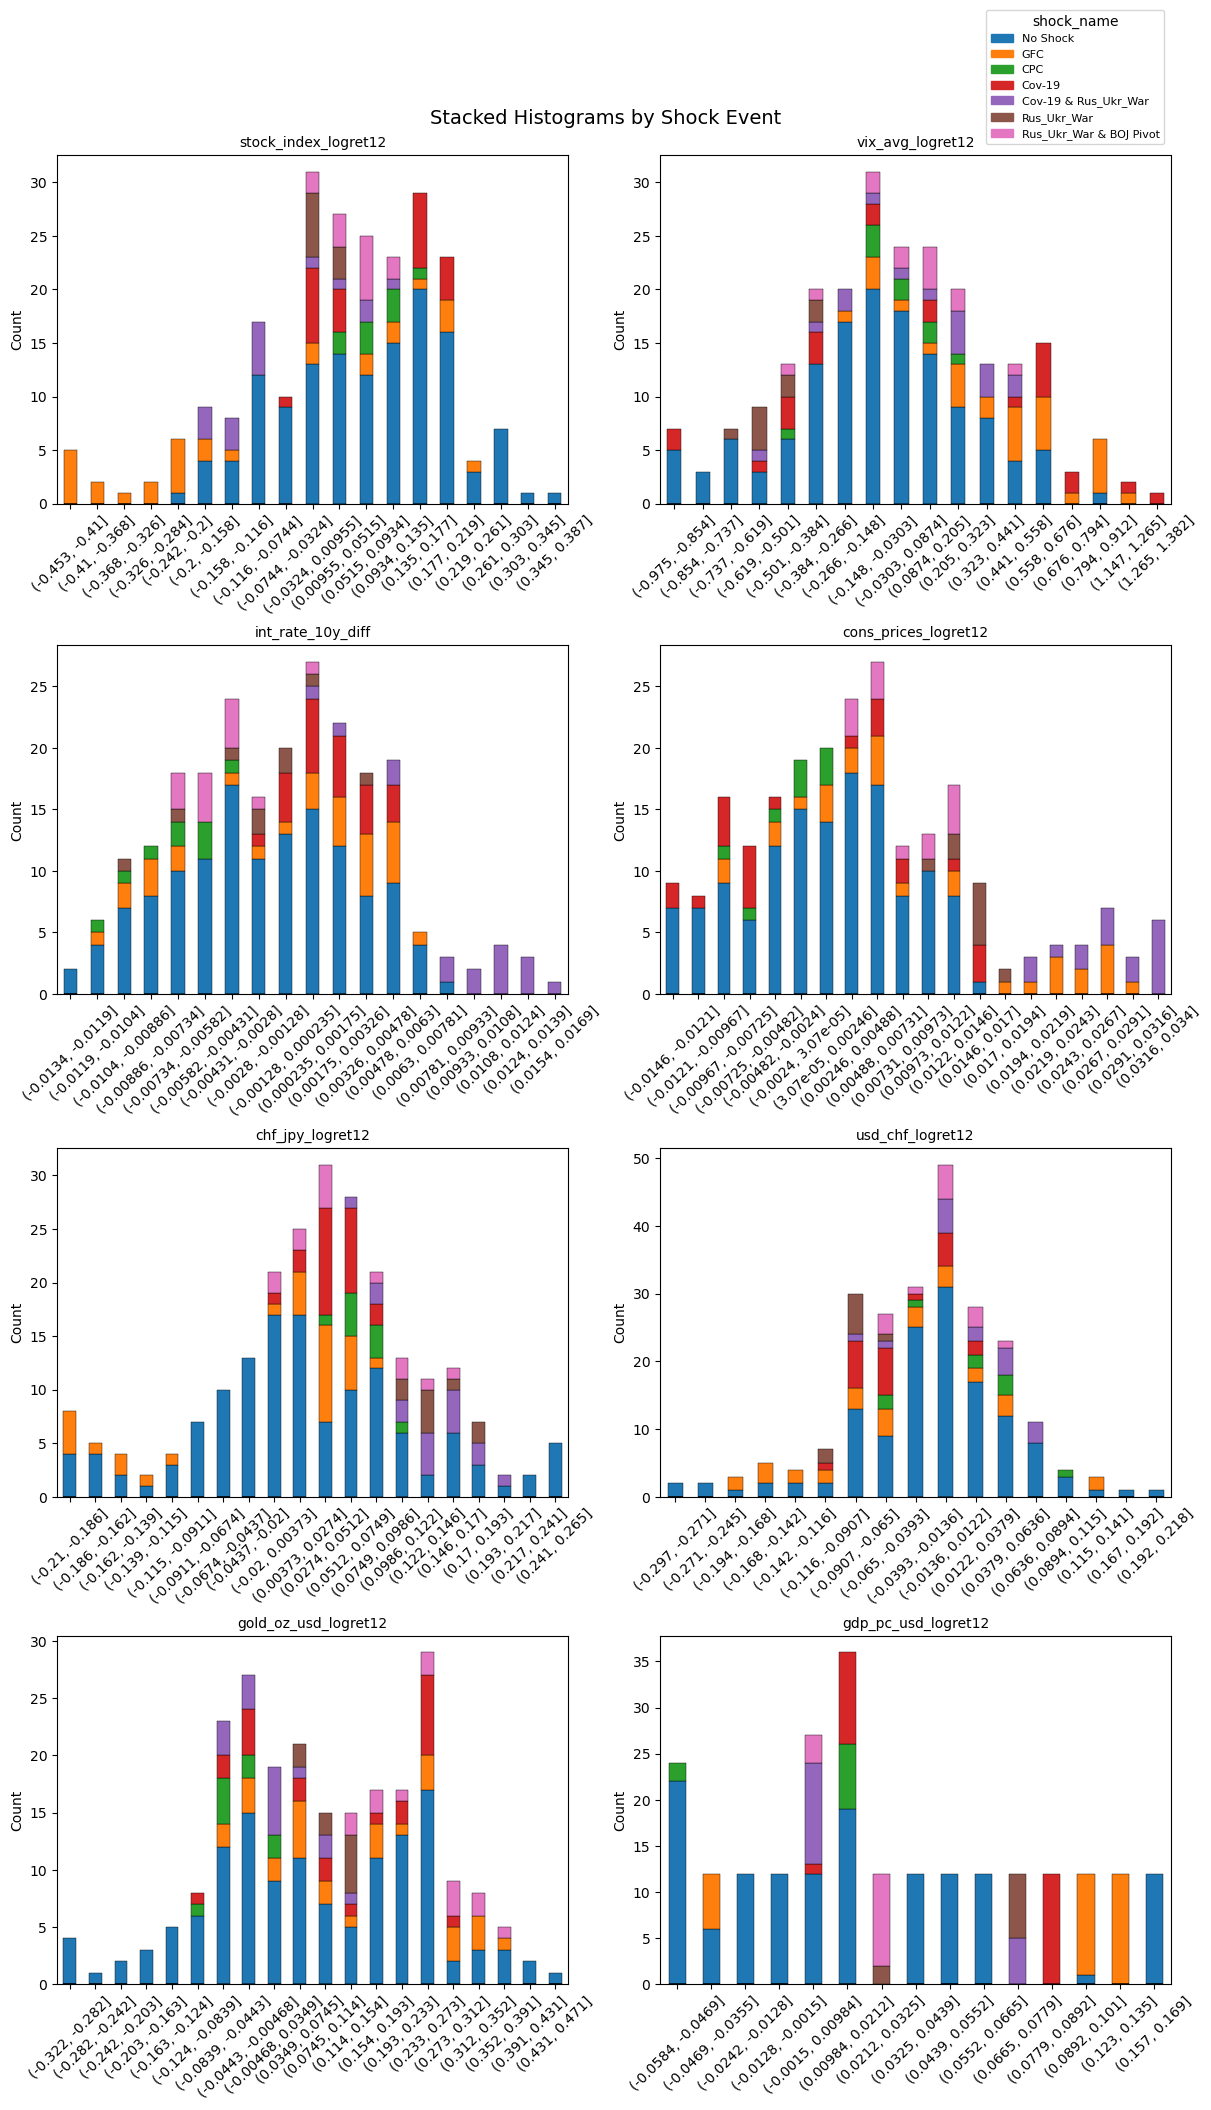

In [112]:
switzerland_scat_vars = ['stock_index_logret12', 'vix_avg_logret12', 'int_rate_10y_diff', 'cons_prices_logret12', 'chf_jpy_logret12', \
                         'usd_chf_logret12','gold_oz_usd_logret12','gdp_pc_usd_logret12']

shockstack_grid(df=sub_switzerland_1_copy, vars_to_plot=switzerland_scat_vars, hue='shock_name', bins=20, cols=2, save=True, filename='switzerland_hist_pre_stat',\
                output_dir=r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Analysis\Visualizations')

#### Inflation rate and 10-year interest rate had right tail impact, and stock market index had left tail impact -- from shock periods -- but in the case of the former two variables, the actual rates were relatively low compared with most other countries examined here.  The Swiss stock market index was impacted strongly by the GFC (left tail), which caused a major decline.  However, as for the other countries, many variables experienced mean reversion pendulum swings of their data values during shock periods.

In [116]:
# Export the Switzerland subset dataframe that was modified for use in categorical plots
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
sub_switzerland_1_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'switzerland_cat_pre_stat.pkl'))